In [47]:
import serial
import time
ser = serial.Serial("COM7", 9600) 
readCommand = b'\xAA\x04\x91\x00\x00\x40\x00\x40\x05\x00\x00\x30\x75\xB8\x0B\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x2E'
commandPC = b'\xAA\x04\x92\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x42'
commandON = b'\xAA\x04\x92\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x43'
commandOFF = b'\xAA\x04\x92\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x42'

In [48]:
ser.flushInput()
ser.flushOutput()
ser.write(commandPC)

26

In [49]:
ser.write(commandON)

26

In [50]:
ser.flushInput()
ser.flushOutput()
ser.write(readCommand)
data = ser.read(26)
print(data)

b'\xaa\x04\x91\x99\x01\x95\x0b\x00\x00\x0c\x000u\xb8\x0b\xd4\x02\x03\x01\x90\x01\x00\x00P\xc3k'


In [57]:
datahex = data.hex()
bytelist = [datahex[i:i+2] for i in range(0,len(datahex),2)]
current = bytelist[4] + bytelist[3]
print(current)
print(int(current,16)/1000)

99
01
0199
0.409
153
1


In [ ]:
while True:
    time.sleep(1)
    ser.write(commandON)
    time.sleep(1)
    ser.write(commandOFF)

In [60]:
ser.close()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("results.csv")
df = df.sort_values(by=['napieciehigh'])

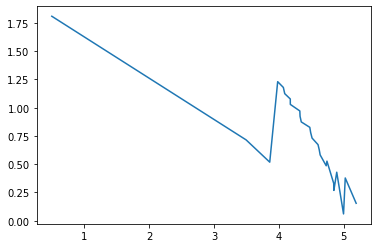

In [10]:
df.sort_values(by=['napieciehigh'])
plt.plot(df['napieciehigh'], df['prad'])
plt.show()

In [13]:
from datetime import date, time, datetime
now = datetime.now()
date_time = now.strftime("%m_%d_%Y %H-%M-%S")
print(date_time)

11_07_2022 20-02-15
